# Histogram Equalization 
> 0712238 Yan-Tong Lin, for DIP2021spring HW2-1

In [1]:
%matplotlib inline

In [2]:
from IPython.display import display, Math, Latex
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

## Original Image

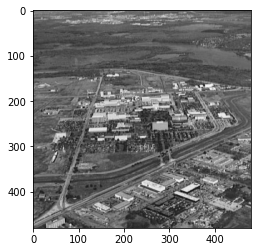

In [3]:
img = Image.open('aerial_view.tif')
_ = plt.imshow(img, cmap='gray')

## Histogram (count/cumulative sum to intensity) of Original Image

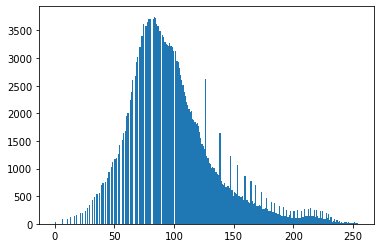

In [4]:
# convert our image into a 1d numpy array and show statistics
img = np.asarray(img)
flat = img.flatten()
# hist = np.histogram(flat, bins=range(256))[0]
stats = plt.hist(flat, bins=range(256), cumulative=0)[0]

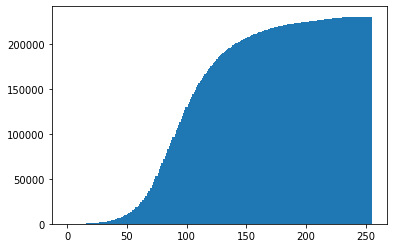

In [5]:
cumulative_sum = plt.hist(flat, bins=range(256), cumulative=1)[0]

## Building the Discrete Histogram Equalization transformation $T$
- $s = T(r) = (L-1)\int\limits_{0}^{r}p_r(w) dw$, discrete version

In [6]:
# $s = T(r) = (L-1)\int\limits_{0}^{r}p_r(w) dw$, discrete version
rng = len(flat)
# an alternative for $M*N$
"""
minv = cumulative_sum.min()
rng = cumulative_sum.max()-cumulative_sum.min() 
T = ((cumulative_sum-minv)/rng*255).astype('uint8')
"""
T = (cumulative_sum/rng*255).astype('uint8')

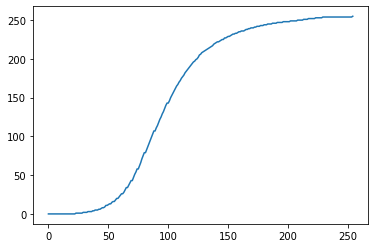

In [7]:
plt.plot(T)

## Applying $T$ to the Original Image

In [8]:
img_he = T[img]

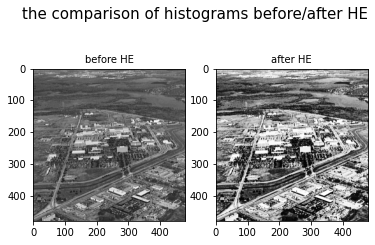

In [13]:
fig = plt.figure()
fig.suptitle("the comparison of histograms before/after HE", fontsize=15)

fig.add_subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title("before HE", fontsize=10)

fig.add_subplot(1,2,2)
plt.imshow(img_he, cmap='gray')
_ = plt.title("after HE", fontsize=10)

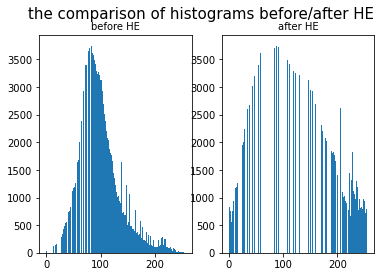

In [12]:
fig = plt.figure()
fig.suptitle("the comparison of histograms before/after HE", fontsize=15)

fig.add_subplot(1,2,1)
plt.hist(flat, bins=range(256))
plt.title("before HE", fontsize=10)

fig.add_subplot(1,2,2)
plt.hist((img_he.flatten()), bins=range(256))
_ = plt.title("after HE", fontsize=10)

plt.show(block=True)

## Comments on the comparison
Similar to the examples in the textbook, we have the distribution of the histogram-equalized picture being closer to a uniform distribution. This results in an enhancement of image contrast 